In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import KNNImputer



In [2]:
df1 = pd.read_csv('MOTOR_COHORT_1_data.csv',usecols=['PATNO', 'NP1RTOT', 'NP1PTOT', 'NP2PTOT', 'PDTRTMNT',
       'NP3TOT', 'DYSKPRES', 'NHY', 'NP4TOT', 'MSEADLG', 'COHORT_x',
       'ENROLL_AGE_x'])
df2 = pd.read_csv('MOTOR_COHORT_2_data.csv',usecols=['PATNO', 'NP1RTOT', 'NP1PTOT', 'NP2PTOT', 'PDTRTMNT',
       'NP3TOT', 'DYSKPRES', 'NHY', 'NP4TOT', 'MSEADLG', 'COHORT_x',
       'ENROLL_AGE_x'])
df3 = pd.read_csv('MOTOR_COHORT_3_data.csv',usecols=['PATNO', 'NP1RTOT', 'NP1PTOT', 'NP2PTOT', 'PDTRTMNT',
       'NP3TOT', 'DYSKPRES', 'NHY', 'NP4TOT', 'MSEADLG', 'COHORT_x',
       'ENROLL_AGE_x'])
df4 = pd.read_csv('MOTOR_COHORT_4_data.csv',usecols=['PATNO', 'NP1RTOT', 'NP1PTOT', 'NP2PTOT', 'PDTRTMNT',
       'NP3TOT', 'DYSKPRES', 'NHY', 'NP4TOT', 'MSEADLG', 'COHORT_x',
       'ENROLL_AGE_x'])

In [3]:

# le = LabelEncoder()
# df1['COHORT_DEFINITION_x'] = le.fit_transform(df1['COHORT_DEFINITION_x'])
# df2['COHORT_DEFINITION_x'] = le.fit_transform(df2['COHORT_DEFINITION_x'])
# df3['COHORT_DEFINITION_x'] = le.fit_transform(df3['COHORT_DEFINITION_x'])
# df4['COHORT_DEFINITION_x'] = le.fit_transform(df4['COHORT_DEFINITION_x'])


In [3]:
df1.sample(3)
# df1_ = df1.loc['PATNO']

,PATNO,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
11469,42429,6.0,5.0,12.0,1.0,31.0,1.0,2.0,6.0,100.0,1,68.2
15525,207396,2.0,3.0,8.0,1.0,12.0,0.0,1.0,NaN,95.0,1,57.1
13445,75484,0.0,4.0,5.0,1.0,NaN,0.0,2.0,7.0,90.0,1,57.6


In [5]:
# df1.drop(columns=['EVENT_ID','COHORT_DEFINITION_x'],inplace=True)


In [4]:
df1.columns


Index(['PATNO', 'NP1RTOT', 'NP1PTOT', 'NP2PTOT', 'PDTRTMNT', 'NP3TOT',
       'DYSKPRES', 'NHY', 'NP4TOT', 'MSEADLG', 'COHORT_x', 'ENROLL_AGE_x'],
      dtype='object')

In [7]:
# Group DataFrame by 'PATNO' and fill missing values with median within each group
grouped_df = df1.groupby('PATNO').transform(lambda x: x.fillna(x.mean()))

# Add 'PATNO' column back to the filled DataFrame
df1_filled = pd.concat([df1['PATNO'], grouped_df], axis=1)



In [8]:
df1.head(17)

,PATNO,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
0,3001,0.0,8.0,2.0,0.0,12.0,0.0,1.0,NaN,95.0,1,65.1
1,3001,9.0,11.0,11.0,NaN,NaN,NaN,NaN,1.0,65.0,1,65.1
2,3001,10.0,13.0,22.0,NaN,NaN,NaN,NaN,3.0,70.0,1,65.1
3,3001,6.0,12.0,21.0,NaN,NaN,NaN,NaN,NaN,70.0,1,65.1
4,3001,1.0,6.0,2.0,NaN,18.0,0.0,2.0,NaN,95.0,1,65.1
5,3001,0.0,7.0,2.0,0.0,18.0,0.0,2.0,NaN,95.0,1,65.1
6,3001,0.0,7.0,3.0,0.0,23.0,0.0,2.0,NaN,95.0,1,65.1
7,3001,1.0,7.0,3.0,0.0,19.0,0.0,2.0,NaN,90.0,1,65.1
8,3001,4.0,8.0,3.0,0.0,20.0,0.0,2.0,NaN,95.0,1,65.1
9,3001,1.0,8.0,4.0,0.0,29.0,0.0,2.0,NaN,95.0,1,65.1


In [9]:
df1_filled.head(17)

,PATNO,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
0,3001,0.0,8.0,2.0,0.00,12.000000,0.000000,1.000000,2.0,95.0,1,65.1
1,3001,9.0,11.0,11.0,0.72,31.782609,0.166667,1.958333,1.0,65.0,1,65.1
2,3001,10.0,13.0,22.0,0.72,31.782609,0.166667,1.958333,3.0,70.0,1,65.1
3,3001,6.0,12.0,21.0,0.72,31.782609,0.166667,1.958333,2.0,70.0,1,65.1
4,3001,1.0,6.0,2.0,0.72,18.000000,0.000000,2.000000,2.0,95.0,1,65.1
5,3001,0.0,7.0,2.0,0.00,18.000000,0.000000,2.000000,2.0,95.0,1,65.1
6,3001,0.0,7.0,3.0,0.00,23.000000,0.000000,2.000000,2.0,95.0,1,65.1
7,3001,1.0,7.0,3.0,0.00,19.000000,0.000000,2.000000,2.0,90.0,1,65.1
8,3001,4.0,8.0,3.0,0.00,20.000000,0.000000,2.000000,2.0,95.0,1,65.1
9,3001,1.0,8.0,4.0,0.00,29.000000,0.000000,2.000000,2.0,95.0,1,65.1


In [10]:
df1_filled.isnull().sum()

PATNO              0
NP1RTOT           24
NP1PTOT           26
NP2PTOT           26
PDTRTMNT          95
NP3TOT            24
DYSKPRES          24
NHY               24
NP4TOT          1010
MSEADLG            5
COHORT_x           0
ENROLL_AGE_x     118
dtype: int64

In [11]:
grouped_mean_df1 = df1_filled.groupby('PATNO').mean().reset_index()

In [12]:
knn = KNNImputer()
grouped_mean_df1 = pd.DataFrame(knn.fit_transform(grouped_mean_df1),columns = grouped_mean_df1.columns)

In [13]:
grouped_mean_df1.isnull().sum()


PATNO           0
NP1RTOT         0
NP1PTOT         0
NP2PTOT         0
PDTRTMNT        0
NP3TOT          0
DYSKPRES        0
NHY             0
NP4TOT          0
MSEADLG         0
COHORT_x        0
ENROLL_AGE_x    0
dtype: int64

In [14]:
# Define a function to fill missing values and apply KNN imputation
def fill_missing_and_impute(df):
    # Group DataFrame by 'PATNO' and fill missing values with median within each group
    grouped_df = df.groupby('PATNO').transform(lambda x: x.fillna(x.median()))

    # Add 'PATNO' column back to the filled DataFrame
    df_filled = pd.concat([df['PATNO'], grouped_df], axis=1)

    # Calculate the mean of each feature after filling missing values
    grouped_mean_df = df_filled.groupby('PATNO').mean().reset_index()

    # Apply KNN imputation to handle remaining missing values
    knn = KNNImputer()
    grouped_mean_df = pd.DataFrame(knn.fit_transform(grouped_mean_df), columns=grouped_mean_df.columns)
    
    return grouped_mean_df

# Apply the function to all four dataframes
# df1_filled = fill_missing_and_impute(df1)
df2_filled = fill_missing_and_impute(df2)
df3_filled = fill_missing_and_impute(df3)
df4_filled = fill_missing_and_impute(df4)

c:\Users\91881\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\91881\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\91881\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\91881\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [15]:
f = pd.concat([grouped_mean_df1
               ,df2_filled,df3_filled,df4_filled])

In [16]:
f.sample(10)

,PATNO,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
257,3589.0,1.700000,5.000000,5.900000,0.444444,24.500000,0.000000,2.000000,0.0000,90.000000,1.0,74.90
105,3521.0,0.307692,8.923077,2.076923,0.000000,3.000000,0.000000,0.230769,0.0000,99.230769,2.0,64.60
309,56492.0,4.285714,7.428571,3.785714,0.000000,7.357143,0.000000,0.000000,1.0900,93.571429,4.0,65.90
288,293485.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0000,100.000000,2.0,60.30
1727,311981.0,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,100.000000,4.0,65.78
482,5009.0,0.500000,1.833333,3.000000,1.000000,34.000000,0.000000,2.000000,0.0000,90.000000,1.0,76.50
1366,256657.0,1.000000,0.000000,2.000000,0.000000,25.000000,0.000000,2.000000,0.0000,100.000000,1.0,56.80
1313,241216.0,2.000000,2.000000,8.000000,0.000000,30.000000,0.000000,2.000000,0.0000,95.000000,1.0,68.00
1183,191075.0,1.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0000,100.000000,4.0,62.90
776,75484.0,0.250000,3.875000,3.875000,1.000000,14.600000,0.266667,1.600000,4.4375,94.375000,1.0,57.60


In [17]:
le = LabelEncoder()
f['COHORT_x'] = le.fit_transform(f['COHORT_x'])

In [18]:
f.sample(10)

,PATNO,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
120,41290.0,0.000000,0.000000,1.000000,0.000000,9.000000,0.000000,1.00000,0.100000,100.000000,3,63.10
867,149873.0,1.000000,4.000000,3.000000,0.000000,4.000000,0.000000,1.00000,0.000000,100.000000,3,67.08
1655,292766.0,3.000000,2.000000,1.000000,0.000000,4.000000,0.000000,0.00000,0.000000,100.000000,3,66.30
555,74544.0,0.444444,1.555556,0.222222,0.000000,0.111111,0.000000,0.00000,0.512500,100.000000,3,68.80
36,3172.0,0.000000,5.166667,0.166667,0.000000,1.500000,0.000000,0.00000,0.000000,99.153846,1,70.00
113,3265.0,2.000000,7.000000,8.000000,0.424581,23.000000,0.000000,2.00000,1.435458,90.000000,0,51.18
1548,239603.0,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,100.000000,3,60.10
280,3630.0,2.250000,4.500000,11.000000,0.333333,17.250000,0.000000,1.50000,0.000000,87.500000,0,61.20
77,3180.0,3.178571,12.500000,15.428571,0.814815,31.666667,0.148148,20.62963,3.043478,86.034483,0,60.60
1533,238052.0,0.000000,2.000000,0.000000,0.000000,5.000000,0.000000,0.00000,0.000000,95.000000,3,71.10


In [19]:
f['COHORT_x'].value_counts()

COHORT_x
3    1728
0    1441
1     295
2      81
Name: count, dtype: int64

In [20]:
f.to_csv('motor_final.csv', index=False)

In [26]:
new_df = pd.read_csv('motor_final.csv')
new_df = new_df.reset_index(drop=True)
new_df.sample(10)

,PATNO,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
1886,17608.0,3.272727,2.136364,2.727273,0.090909,3.409091,0.0,0.181818,0.000000,98.181818,3,60.8
1999,50184.0,0.777778,2.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,100.000000,3,57.8
1969,42128.0,3.357143,3.571429,1.714286,0.000000,6.142857,0.0,0.285714,0.200000,98.928571,3,60.6
863,102479.0,0.250000,4.500000,3.000000,0.750000,30.000000,0.0,1.857143,0.375000,93.888889,0,50.3
2498,102527.0,2.200000,10.200000,7.800000,0.000000,11.500000,0.0,1.200000,0.333333,92.000000,3,65.1
1674,130074.0,1.000000,4.750000,0.750000,0.000000,4.000000,0.0,0.000000,0.000000,100.000000,1,76.4
3121,212513.0,4.000000,8.000000,3.000000,0.000000,13.000000,0.0,101.000000,0.000000,92.500000,3,76.8
1211,211239.0,0.000000,4.500000,5.000000,0.000000,13.500000,0.0,1.500000,0.000000,100.000000,0,82.7
813,101175.0,4.500000,8.200000,15.900000,0.600000,49.555556,0.0,2.800000,0.000000,77.500000,0,70.9
1441,3000.0,1.666667,4.444444,0.000000,0.000000,5.666667,0.0,0.000000,0.000000,95.000000,1,69.1


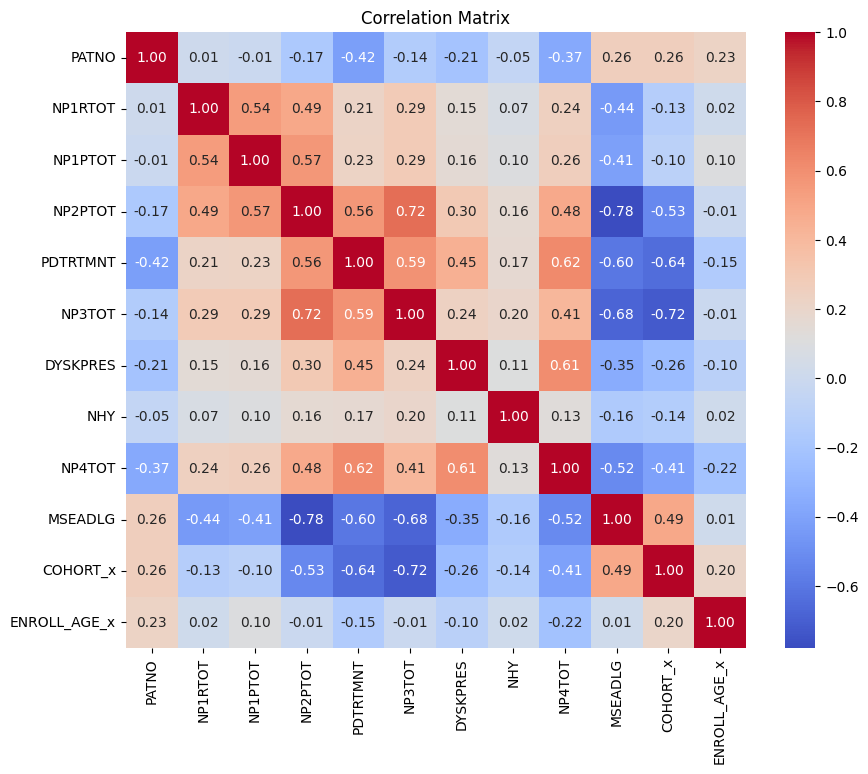

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
new_df.drop(columns=['PATNO'])

,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,COHORT_x,ENROLL_AGE_x
0,3.758621,9.793103,9.896552,0.720000,31.782609,0.166667,1.958333,2.000000,84.482759,0,65.10
1,4.500000,8.571429,17.821429,0.880000,27.166667,0.080000,2.360000,3.130435,77.321429,0,67.60
2,1.500000,10.625000,8.708333,0.571429,40.578947,0.200000,2.250000,2.076923,85.833333,0,56.70
3,1.757143,5.430952,11.066667,0.384333,5.000000,0.000000,0.000000,1.166996,88.349248,0,59.68
4,1.285714,1.000000,9.428571,0.666667,28.857143,0.000000,2.142857,0.000000,92.714286,0,57.50
...,...,...,...,...,...,...,...,...,...,...,...
3540,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3,60.60
3541,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,95.000000,3,61.20
3542,1.000000,8.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,100.000000,3,67.12
3543,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,95.000000,3,67.90


In [44]:
X =  new_df.drop(['COHORT_x','PATNO'],axis=1)
y= new_df['COHORT_x']

In [45]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)


In [46]:
X_over.head()

,NP1RTOT,NP1PTOT,NP2PTOT,PDTRTMNT,NP3TOT,DYSKPRES,NHY,NP4TOT,MSEADLG,ENROLL_AGE_x
0,3.758621,9.793103,9.896552,0.720000,31.782609,0.166667,1.958333,2.000000,84.482759,65.10
1,4.500000,8.571429,17.821429,0.880000,27.166667,0.080000,2.360000,3.130435,77.321429,67.60
2,1.500000,10.625000,8.708333,0.571429,40.578947,0.200000,2.250000,2.076923,85.833333,56.70
3,1.757143,5.430952,11.066667,0.384333,5.000000,0.000000,0.000000,1.166996,88.349248,59.68
4,1.285714,1.000000,9.428571,0.666667,28.857143,0.000000,2.142857,0.000000,92.714286,57.50


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

In [48]:
svm = SVC(kernel="rbf", gamma="auto",probability=True)
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)

accuracy_SVM = accuracy_score(prediction, y_test)
print(accuracy_SVM)

0.8744221879815101


In [49]:
dec = DecisionTreeClassifier(random_state=4)
dec.fit(X_train,y_train)
pred = dec.predict(X_test)
accuracy_DEC = accuracy_score(pred, y_test)
print(accuracy_DEC)

0.911402157164869


In [80]:
rand = RandomForestClassifier(max_depth=20, random_state=0)
rand.fit(X_train,y_train)
rand_pred = rand.predict(X_test)
rand_accuracy = accuracy_score(rand_pred,y_test)
print(rand_accuracy)

0.9368258859784283


In [81]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rand, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.88857546 0.8787024  0.87447109 0.89562764 0.87588152]
Mean Accuracy: 0.8826516220028209


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialize and train the gradient boosting classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
gb_pred = gb_clf.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(gb_pred, y_test)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

Gradient Boosting Classifier Accuracy: 0.9252696456086287


In [83]:
from sklearn.ensemble import VotingClassifier
# Create a Soft Voting Classifier
labels = ['Decision Forest', 'Random Forest','GB','svm']
voting_clf_hard = VotingClassifier(
	estimators=[
        (labels[0], dec),
		(labels[1], rand), 
		(labels[2],gb_clf ), 
        (labels[3], svm),
	],
	voting='hard' # Specify hard voting, where class probabilities are combined
)

In [84]:
voting_clf_hard.fit(X_train,y_train)
V_hard_pred = voting_clf_hard.predict(X_test)
voting_hard_accuracy = accuracy_score(V_hard_pred,y_test)
print(voting_hard_accuracy)

0.9360554699537751


In [86]:
labels = ['Decision Forest', 'Random Forest','GB','svm']
voting_clf_soft = VotingClassifier(
	estimators=[
        (labels[0], dec),
		(labels[1], rand), 
		(labels[2],gb_clf ), 
        (labels[3], svm),
	],
	voting='soft' # Specify soft voting, where class probabilities are combined
)

In [85]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(voting_clf_hard, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.8899859  0.88293371 0.87588152 0.89844852 0.8787024 ]
Mean Accuracy: 0.8851904090267982


In [89]:
import pickle
import joblib
model=voting_clf_hard

with open("model_Motor.pkl", "wb") as f:
    pickle.dump(model, f)
    
with open("model_Motor.pkl", "rb") as f:
    model = pickle.load(f)
    
joblib.dump(model, "model_Motor.joblib")
model = joblib.load("model_Motor.joblib")

In [64]:
array = ([[  3,   10,   10,   0,   31,   0.1,   2,   2, 84,  63]])
voting_clf_hard.predict(array)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [71]:
arr = [array([  0,   0,   1,   0,   9,   0,   0,   0, 100,  63])]


TypeError: 'list' object is not callable